In [24]:
# remove warning message
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# required library
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from local_utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
import glob
import functions
import visualize_functions
import importlib
importlib.reload(functions)
importlib.reload(visualize_functions)

wpod_net_path = "wpod-net.json"
wpod_net = functions.load_model(wpod_net_path)

Loading model successfully...


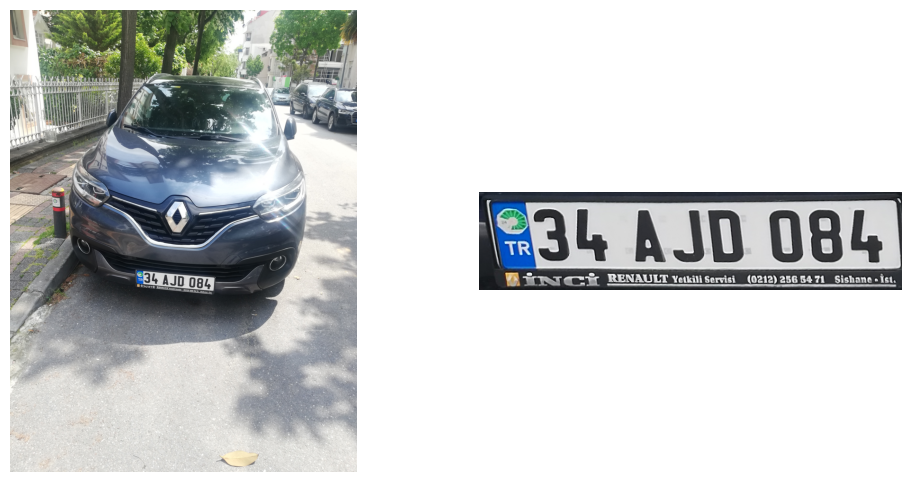

In [12]:

#test_image_path = "test_2.jpg"
test_image_path = "test/34AJD084.jpg"
vehicle, LpImg,cor = functions.get_plate(test_image_path,wpod_net)

fig = plt.figure(figsize=(12,6))
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[0])
plt.axis(False)
plt.imshow(vehicle)
grid = gridspec.GridSpec(ncols=2,nrows=1,figure=fig)
fig.add_subplot(grid[1])
plt.axis(False)
plt.imshow(LpImg[0])

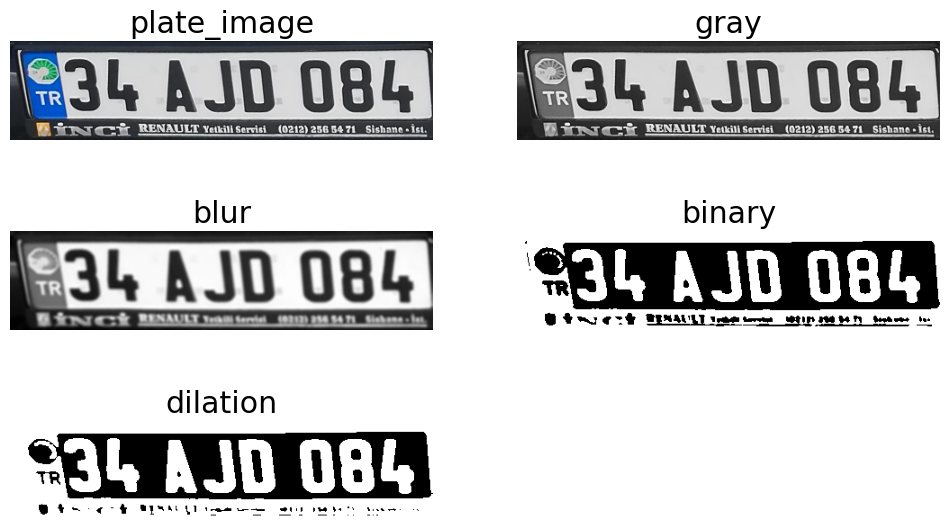

In [16]:

plate_image, gray, blur, binary,thre_mor=functions.morph_pictures(LpImg)
visualize_functions.draw_morphed_plates(plate_image, gray, blur, binary,thre_mor)

    


Detect 9 letters...


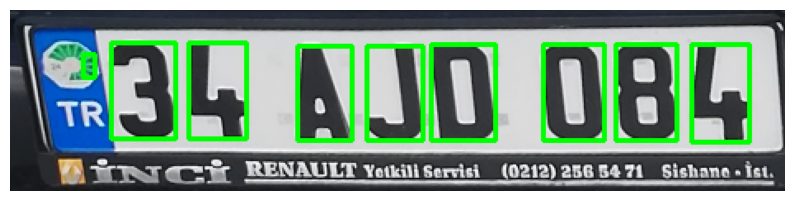

In [20]:
# Create sort_contours() function to grab the contour of each digit from left to right


cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creat a copy version "test_roi" of plat_image to draw bounding box
if plate_image is not None:
    test_roi = plate_image.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 30, 60

for c in functions.sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.1: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Sperate number and gibe prediction
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)

print("Detect {} letters...".format(len(crop_characters)))
fig = plt.figure(figsize=(10,6))
plt.axis(False)
plt.imshow(test_roi)
#plt.savefig('grab_digit_contour.png',dpi=300)

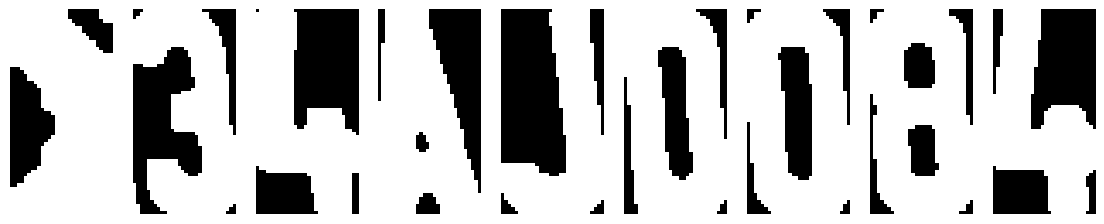

In [22]:
visualize_functions.draw_segmented_chars(crop_characters)

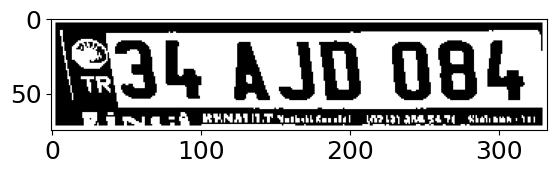

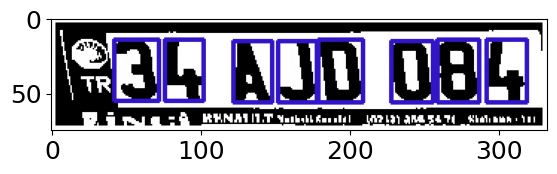

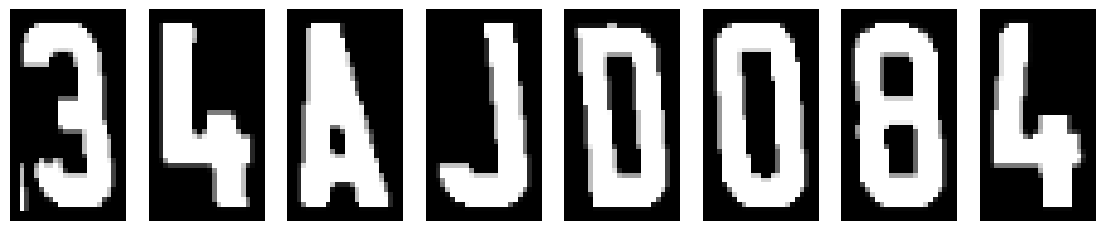

In [28]:

a=functions.segment_characters(plate_image)
visualize_functions.draw_segmented_chars(a)

# The end!